In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl


In [19]:
df = pd.read_csv('../task1/Data.csv')

In [20]:
df

,Path,Identity,Facial Expression,age
0,../data/haziq_0 (42).jpeg,haziq,0,21
1,../data/sulaiman_0 (44).jpeg,sulaiman,0,26
2,../data/sulaiman_1 (31).jpeg,sulaiman,1,26
3,../data/sulaiman_0 (38).jpeg,sulaiman,0,26
4,../data/sulaiman_0 (43).jpeg,sulaiman,0,26
...,...,...,...,...
56,../data/haziq_0 (46).jpeg,haziq,0,21
57,../data/haziq_1 (14).jpeg,haziq,1,21
58,../data/haziq_1 (9).jpeg,haziq,1,21
59,../data/sulaiman_0 (33).jpeg,sulaiman,0,26


In [21]:
file_name = '../task1/Compressed_data'
with open(file_name, 'rb') as handle:
    feature_matrix = pkl.load(handle)
print(feature_matrix.shape)

(61, 6912)


In [22]:
X = feature_matrix
y = df['Identity']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=32)

In [24]:
model = DecisionTreeClassifier(criterion='entropy',random_state=32)

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

In [26]:
y_pred = model.predict(X_test)

Accuracy: 0.8421052631578947
Classwise Classification Report: 
              precision    recall  f1-score   support

       haziq       0.77      1.00      0.87        10
    sulaiman       1.00      0.67      0.80         9

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19


Confusion Matrix: 


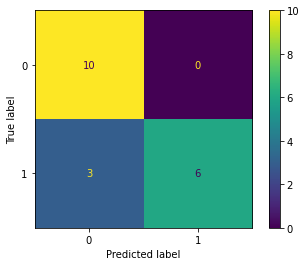

In [27]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()

In [ ]:
model_file = 'Decision_model_face_identity.sav'
pkl.dump(model,open(model_file,'wb'))